In [31]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

In [35]:
df = pd.read_csv('06_acetylcholinesterase_bioactivity_data_3classes_pubchem_fp_pIC50.csv')

In [36]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.679854
6152,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.562249
6153,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.118045
6154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.259637


In [37]:
X = df.drop('pIC50', axis = 1)
X.shape

(6156, 881)

In [38]:
Y = df.pIC50
Y.shape

(6156,)

In [39]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold = (.8 * (1 - .8)))
X = selection.fit_transform(X)

In [40]:
X.shape

(6156, 144)

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [42]:
X_train.shape, Y_train.shape

((4924, 144), (4924,))

In [43]:
X_test.shape, Y_test.shape

((1232, 144), (1232,))

In [44]:
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5393620214046788

In [45]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

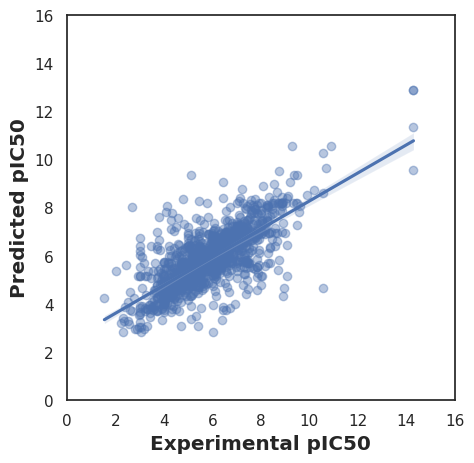

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)
sns.set_style("white")
ax = sns.regplot(x = Y_test, y = Y_pred, scatter_kws = {'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_ylabel('Predicted pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_xlim(0, 16)
ax.set_ylim(0, 16)
ax.figure.set_size_inches(5, 5)
plt.show
